In [2]:
import numpy as np
from scipy.integrate import quad
from math import factorial
import matplotlib.pyplot as plt
import sympy as sp


from scipy import linalg
from numpy.polynomial import legendre as leg

sp.init_printing(use_latex='mathjax')

np.set_printoptions(precision=5)

INTEGRATION_RANGE = 0.8, 1.7
PRECISION = 0.0001
a, b = INTEGRATION_RANGE

def f(x):
    return np.cos(x) / (x + 1)

def f_prime1(x):
    return -((x + 1) * np.sin(x) + np.cos(x)) / (x + 1) ** 2

def f_prime2(x):
    return (2 * (x + 1) * np.sin(x) - (x ** 2 + 2 * x - 1) * np.cos(x)) / (x + 1) ** 3

def f_prime3(x):
    return (3 * (x ** 2 + 2 * x - 1) * np.cos(x) + (x ** 3 + 3 * x ** 2 - 3 * x - 5) * np.sin(x)) / (x + 1) ** 4

def f_prime_4(x):
    return ((x ** 4 + 4 * x ** 3 - 6 * x ** 2 - 20 * x + 13) * np.cos(x) - 4 * (x ** 3 + 3 * x ** 2 - 3 * x - 5) * np.sin(x)) / (x + 1) ** 5

def trapezoidal_integral(f, a, b, eps):
    n = 2  
    while True:
        x = np.linspace(a, b, n + 1)
        y = f(x)

        integral = (b - a) / (2 * n) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
        
        h = (b - a) / n
        maximum = np.max(np.abs(f_prime2(np.linspace(a, b, 100))))
        error = ((b - a) ** 3 / (12 * n ** 2)) * maximum

        
        if error < eps:
            break
        n *= 2  
    return integral, error


def leggauss(deg):
    if not isinstance(deg, int) or deg <= 0:
        raise ValueError("deg must be a positive integer")
    c = np.zeros(deg + 1)
    c[-1] = 1
    m = leg.legcompanion(c)
    x = linalg.eigvalsh(m)
    
    fm = leg.legval(x, c[1:])
    fm /= np.abs(fm).max()
    df /= np.abs(df).max()
    w = 1/(fm * df)
    
    w = (w + w[::-1])/2
    x = (x - x[::-1])/2

    w *= 2. / w.sum()
    return x, w


def gauss_quadrature(f, a, b, eps):
    n = 1
    prev_result = 0
    
    while True:
        x, w = np.polynomial.legendre.leggauss(n)
        t = 0.5 * (b - a) * x + 0.5 * (b + a)
        current_result = 0.5 * (b - a) * np.sum(w * f(t))
 
        error = abs(current_result - prev_result)

        if error < eps and n > 1:
            return current_result, error
        prev_result = current_result
        n *= 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Результати обчислень:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Порівняння результатів:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

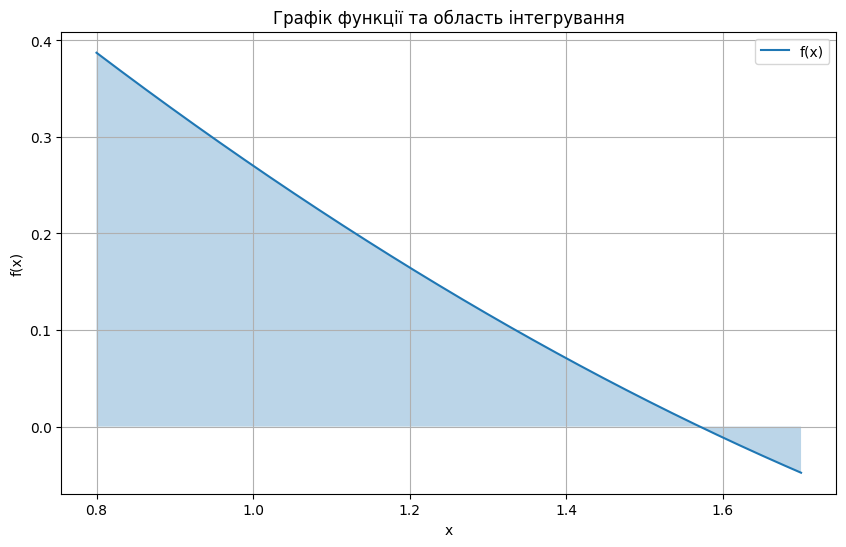

In [3]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from IPython.display import display, Math

a, b = 0.8, 1.7
PRECISION = 0.0001

def f(x):
    return np.cos(x) / (x + 1)

display(Math(r'\int_{0.8}^{1.7} \frac{\cos(x)}{x + 1} dx'))

display(Math(r'\text{Метод трапецій: } \int_a^b f(x) dx \approx \frac{b-a}{2n} \left[f(a) + 2\sum_{i=1}^{n-1} f(x_i) + f(b)\right]'))
display(Math(r'\text{Метод Гауса: } \int_a^b f(x) dx \approx \sum_{i=1}^n w_i f(x_i)'))

trapezoidal_result, trapezoidal_error = trapezoidal_integral(f, a, b, PRECISION)
gauss_result, gauss_error = gauss_quadrature(f, a, b, PRECISION)

x_np = np.linspace(a, b, 1000)
y_np = f(x_np)
np_trapz_result = np.trapz(y_np, x_np)

print("\nРезультати обчислень:")
display(Math(r'I_{trap} = ' + f'{trapezoidal_result:.8f}'))
display(Math(r'I_{Gauss} = ' + f'{gauss_result:.8f}'))
display(Math(r'error_{trap} = ' + f'{trapezoidal_error:.8f}'))
display(Math(r'error_{Gauss} = ' + f'{gauss_error:.8f}'))


quad_result, quad_error = quad(f, a, b)

print("\nПорівняння результатів:")
display(Math(r'\text{Різниця між трапецоїдним методом і numpy.trapz:          }' + f'{abs(trapezoidal_result - np_trapz_result):.8f}'))
display(Math(r'\text{Різниця між трапецоїдним методом і scipy.integrate.quad: }' + f'{abs(trapezoidal_result - quad_result):.8f}'))
display(Math(r'\text{Різниця між методом Гауса і quad: }' + f'{abs(gauss_result - quad_result):.8f}'))


x_plot = np.linspace(a, b, 1000)
y_plot = f(x_plot)
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='f(x)')
plt.fill_between(x_plot, y_plot, alpha=0.3)
plt.title('Графік функції та область інтегрування')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()